In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#6.1.4

In [4]:
# 6.1.5 Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities. #6.1.5
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b88d91d4a91a28661c6971a18b313a75


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.#6.2.6
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [19]:
# Loop through all the cities in the list. 6.2.6
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 11 of Set 25 | upernavik
Processing Record 12 of Set 25 | gondanglegi
Processing Record 13 of Set 25 | rawannawi
City not found. Skipping...
Processing Record 14 of Set 25 | port alfred
Processing Record 15 of Set 25 | cape town
Processing Record 16 of Set 25 | tuktoyaktuk
Processing Record 17 of Set 25 | dubreka
Processing Record 18 of Set 25 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 25 | saint-philippe
Processing Record 20 of Set 25 | loiza
Processing Record 21 of Set 25 | kapaa
Processing Record 22 of Set 25 | busselton
Processing Record 23 of Set 25 | ossora
Processing Record 24 of Set 25 | mataura
Processing Record 25 of Set 25 | inhambane
Processing Record 26 of Set 25 | bengkulu
Processing Record 27 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 28 of Set 25 | geraldton
Processing Record 29 of Set 25 | victoria
Processing Record 30 of Set 25 | bashtanka
Processing Record 31 of Set 25 | nizhneyansk
City not fo

Processing Record 33 of Set 28 | petropavlovsk-kamchatskiy
Processing Record 34 of Set 28 | iqaluit
Processing Record 35 of Set 28 | thompson
Processing Record 36 of Set 28 | castro
Processing Record 37 of Set 28 | beringovskiy
Processing Record 38 of Set 28 | mount gambier
Processing Record 39 of Set 28 | moranbah
Processing Record 40 of Set 28 | bethel
Processing Record 41 of Set 28 | batticaloa
Processing Record 42 of Set 28 | irbit
Processing Record 43 of Set 28 | tessalit
Processing Record 44 of Set 28 | poum
Processing Record 45 of Set 28 | marcona
City not found. Skipping...
Processing Record 46 of Set 28 | pangkalanbuun
Processing Record 47 of Set 28 | conceicao do araguaia
Processing Record 48 of Set 28 | coquimbo
Processing Record 49 of Set 28 | black river
Processing Record 50 of Set 28 | kanniyakumari
Processing Record 1 of Set 29 | avera
Processing Record 2 of Set 29 | katsuura
Processing Record 3 of Set 29 | necochea
Processing Record 4 of Set 29 | dunedin
Processing Reco

Processing Record 16 of Set 32 | anadyr
Processing Record 17 of Set 32 | wulanhaote
City not found. Skipping...
Processing Record 18 of Set 32 | sholapur
Processing Record 19 of Set 32 | pacific grove
Processing Record 20 of Set 32 | kigoma
Processing Record 21 of Set 32 | gao
Processing Record 22 of Set 32 | kapit
Processing Record 23 of Set 32 | mukdahan
Processing Record 24 of Set 32 | port hedland
Processing Record 25 of Set 32 | minuri
Processing Record 26 of Set 32 | yulara
Processing Record 27 of Set 32 | aksarka
Processing Record 28 of Set 32 | clyde river
Processing Record 29 of Set 32 | asau
Processing Record 30 of Set 32 | koumac
Processing Record 31 of Set 32 | hoima
Processing Record 32 of Set 32 | deder
Processing Record 33 of Set 32 | lima duarte
Processing Record 34 of Set 32 | marienburg
Processing Record 35 of Set 32 | lagoa
Processing Record 36 of Set 32 | maunabo
Processing Record 37 of Set 32 | palmas bellas
Processing Record 38 of Set 32 | san cristobal
Processing

Processing Record 2 of Set 36 | mayor pablo lagerenza
Processing Record 3 of Set 36 | baykit
Processing Record 4 of Set 36 | santa marta
Processing Record 5 of Set 36 | oron
Processing Record 6 of Set 36 | tomaszow lubelski
Processing Record 7 of Set 36 | karaul
City not found. Skipping...
Processing Record 8 of Set 36 | frolovo
Processing Record 9 of Set 36 | poso
Processing Record 10 of Set 36 | imeni poliny osipenko
Processing Record 11 of Set 36 | sangmelima
Processing Record 12 of Set 36 | stromness
Processing Record 13 of Set 36 | nouadhibou
Processing Record 14 of Set 36 | kaitangata
Processing Record 15 of Set 36 | ancud
Processing Record 16 of Set 36 | shar
Processing Record 17 of Set 36 | zunyi
Processing Record 18 of Set 36 | maungaturoto
Processing Record 19 of Set 36 | itupiranga
Processing Record 20 of Set 36 | ixtapa
Processing Record 21 of Set 36 | brewster
Processing Record 22 of Set 36 | nawa
Processing Record 23 of Set 36 | slave lake
Processing Record 24 of Set 36 |

In [20]:
# 6.2.7 Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,18.00,74,100,8.81,GL,2021-04-22 09:37:40
1,Gondanglegi,-7.7479,112.0132,78.69,74,93,13.60,ID,2021-04-22 09:37:41
2,Port Alfred,-33.5906,26.8910,71.87,68,83,9.62,ZA,2021-04-22 09:37:41
3,Cape Town,-33.9258,18.4232,73.99,64,0,5.75,ZA,2021-04-22 09:37:42
4,Tuktoyaktuk,69.4541,-133.0374,2.37,96,57,9.04,CA,2021-04-22 09:37:42
5,Dubreka,9.7911,-13.5233,82.40,69,20,2.42,GN,2021-04-22 09:37:42
6,Saint-Philippe,-21.3585,55.7679,82.00,78,75,19.57,RE,2021-04-22 09:37:43
7,Loiza,18.4313,-65.8802,77.00,83,40,4.61,PR,2021-04-22 09:37:43
8,Kapaa,22.0752,-159.3190,71.60,94,75,5.75,US,2021-04-22 09:37:44
9,Busselton,-33.6500,115.3333,66.00,72,100,6.53,AU,2021-04-22 09:37:44


In [21]:
# 6.2.7 Reorder the columns
reorder_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-04-22 09:37:40,72.7868,-56.1549,18.00,74,100,8.81
1,Gondanglegi,ID,2021-04-22 09:37:41,-7.7479,112.0132,78.69,74,93,13.60
2,Port Alfred,ZA,2021-04-22 09:37:41,-33.5906,26.8910,71.87,68,83,9.62
3,Cape Town,ZA,2021-04-22 09:37:42,-33.9258,18.4232,73.99,64,0,5.75
4,Tuktoyaktuk,CA,2021-04-22 09:37:42,69.4541,-133.0374,2.37,96,57,9.04
5,Dubreka,GN,2021-04-22 09:37:42,9.7911,-13.5233,82.40,69,20,2.42
6,Saint-Philippe,RE,2021-04-22 09:37:43,-21.3585,55.7679,82.00,78,75,19.57
7,Loiza,PR,2021-04-22 09:37:43,18.4313,-65.8802,77.00,83,40,4.61
8,Kapaa,US,2021-04-22 09:37:44,22.0752,-159.3190,71.60,94,75,5.75
9,Busselton,AU,2021-04-22 09:37:44,-33.6500,115.3333,66.00,72,100,6.53


In [22]:
# 6.2.7 Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# 6.3.1 Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

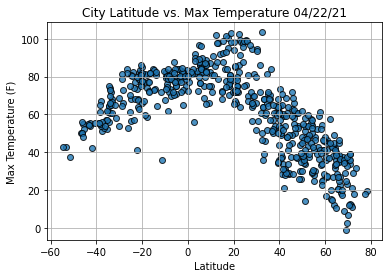

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

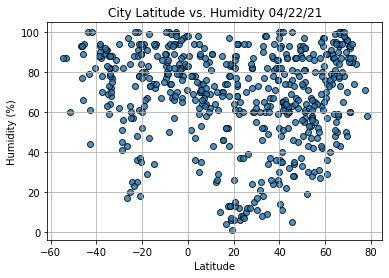

In [25]:
# 6.3.2 Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

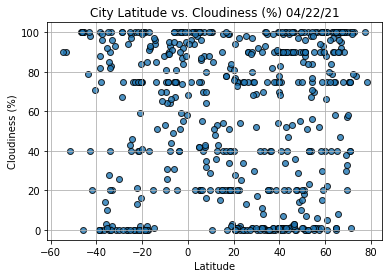

In [26]:
# 6.3.3 Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

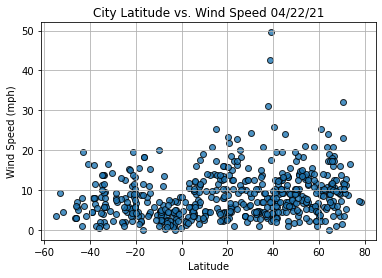

In [27]:
# 6.3.4 Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-28-d58af2435033>, line 3)

In [29]:
# 6.4.2 Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

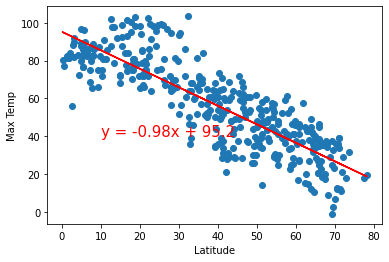

In [31]:
# 6.4.2 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

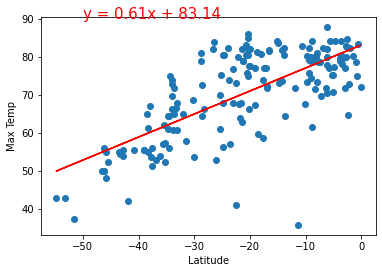

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

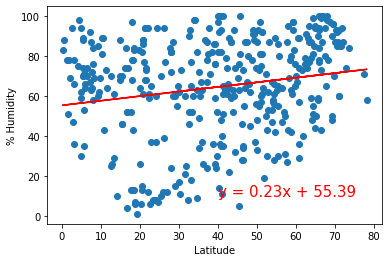

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [34]:
# 6.4.3 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-34-9c3e8b244753>, line 6)

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-35-3dc99b339452>, line 6)

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-36-7024af74f12d>, line 6)

In [37]:
# 6.4.5 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-37-8c4f0e57bb27>, line 6)